### Syntactic Processing Assignment -  POS Tagging

In [89]:
#Importing required libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [90]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/dinesh.veluri/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

### Read Treebank tagged sentences

In [91]:

wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [92]:
print(type(wsj))
print(len(wsj))


<class 'list'>
3914


In [93]:

wsj[0:40]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

### Split the test and train data sets

In [94]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.2)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3131
783
[[('Similarly', 'ADV'), (',', '.'), ('Rick', 'NOUN'), ('Wamre', 'NOUN'), (',', '.'), ('a', 'DET'), ('31-year-old', 'ADJ'), ('asset', 'NOUN'), ('manager', 'NOUN'), ('for', 'ADP'), ('a', 'DET'), ('Dallas', 'NOUN'), ('real-estate', 'NOUN'), ('firm', 'NOUN'), (',', '.'), ('would', 'VERB'), ('like', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('see', 'VERB'), ('program', 'NOUN'), ('trading', 'NOUN'), ('disappear', 'VERB'), ('because', 'ADP'), ('``', '.'), ('I', 'PRON'), ('ca', 'VERB'), ("n't", 'ADV'), ('see', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ('does', 'VERB'), ('anything', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('market', 'NOUN'), ('or', 'CONJ'), ('the', 'DET'), ('country', 'NOUN'), ('.', '.'), ("''", '.')], [('And', 'CONJ'), ('while', 'ADP'), ('there', 'DET'), ('was', 'VERB'), ('no', 'DET'), ('profit', 'NOUN'), ('*ICH*-1', 'X'), ('this', 'DET'), ('year', 'NOUN'), ('from', 'ADP'), ('discontinued', 'VERB'), ('operations', 'NOUN'), (',', '.'), ('last', 'ADJ'), ('year', 'NOUN'), (

#### Train data set exploration

In [95]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

81350

In [96]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Similarly',
 ',',
 'Rick',
 'Wamre',
 ',',
 'a',
 '31-year-old',
 'asset',
 'manager',
 'for']

In [97]:
# vocabulary
V = set(tokens)
print(len(V))

11083


In [98]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [99]:
#unique tags in the train set 
print(T)

{'ADJ', 'VERB', 'DET', 'PRT', 'CONJ', 'NUM', 'X', 'PRON', 'NOUN', 'ADP', 'ADV', '.'}


## Vanilla Viterbi POS Tagger 

In [73]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [74]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [101]:
# examples

# large
print("\n", "sound")
print(word_given_tag('sound', 'ADJ'))
print(word_given_tag('sound', 'VERB'))
print(word_given_tag('sound', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'DET'))
print(word_given_tag('will', 'NOUN'))
print(word_given_tag('will', 'VERB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NOUN'))
print(word_given_tag('book', 'VERB'))


 sound
(1, 5169)
(2, 10881)
(5, 23335) 


 will
(0, 7013)
(1, 23335)
(234, 10881)

 book
(7, 23335)
(0, 10881)


In [102]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [107]:
# examples
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('NOUN', 'ADJ'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1(',', 'NOUN'))
print(t2_given_t1('PRON', 'PRON'))

(3614, 5167)
(3614, 5167)
(4517, 7086)
(1211, 10960)
(0, 23245)
(15, 2243)


In [108]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('ADJ', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('PRON', '.'))



(1631, 9458)
(421, 9458)
(2065, 9458)
(630, 9458)


In [109]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [110]:
tags_matrix

array([[6.52216002e-02, 1.16121536e-02, 5.22546936e-03, 1.10315466e-02,
        1.76117662e-02, 2.03212705e-02, 2.03212705e-02, 5.80607681e-04,
        6.99438751e-01, 7.87691101e-02, 5.03193354e-03, 6.48345277e-02],
       [6.60583973e-02, 1.70164227e-01, 1.34306565e-01, 3.17518264e-02,
        5.56569360e-03, 2.29927003e-02, 2.15419710e-01, 3.57664227e-02,
        1.10492699e-01, 9.12408754e-02, 8.26642364e-02, 3.35766412e-02],
       [2.04911098e-01, 4.14902642e-02, 5.36268717e-03, 2.82246678e-04,
        4.23370017e-04, 2.03217603e-02, 4.58650850e-02, 3.81033029e-03,
        6.37454152e-01, 9.73751023e-03, 1.25599774e-02, 1.77815408e-02],
       [8.67895558e-02, 3.97465438e-01, 1.04454689e-01, 1.53609831e-03,
        2.30414746e-03, 5.56835644e-02, 1.15207378e-02, 1.84331797e-02,
        2.46543780e-01, 2.11213510e-02, 9.60061420e-03, 4.45468500e-02],
       [1.20633185e-01, 1.55567691e-01, 1.23908296e-01, 4.91266372e-03,
        0.00000000e+00, 3.98471616e-02, 7.64192129e-03, 6.44

In [111]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [112]:
tags_df 

,ADJ,VERB,DET,PRT,CONJ,NUM,X,PRON,NOUN,ADP,ADV,.
ADJ,0.065222,0.011612,0.005225,0.011032,0.017612,0.020321,0.020321,0.000581,0.699439,0.078769,0.005032,0.064835
VERB,0.066058,0.170164,0.134307,0.031752,0.005566,0.022993,0.215420,0.035766,0.110493,0.091241,0.082664,0.033577
DET,0.204911,0.041490,0.005363,0.000282,0.000423,0.020322,0.045865,0.003810,0.637454,0.009738,0.012560,0.017782
PRT,0.086790,0.397465,0.104455,0.001536,0.002304,0.055684,0.011521,0.018433,0.246544,0.021121,0.009601,0.044547
CONJ,0.120633,0.155568,0.123908,0.004913,0.000000,0.039847,0.007642,0.064410,0.344978,0.049127,0.053493,0.035480
NUM,0.035765,0.017705,0.003187,0.027975,0.013810,0.180949,0.211756,0.001062,0.352691,0.035057,0.003187,0.116856
X,0.017439,0.208701,0.053816,0.185074,0.010313,0.001875,0.073317,0.053816,0.061316,0.144197,0.025689,0.164448
PRON,0.071333,0.480606,0.008917,0.012929,0.004904,0.008025,0.092733,0.006687,0.212662,0.020062,0.038787,0.042354
NOUN,0.011744,0.145322,0.013422,0.043966,0.042805,0.009766,0.029641,0.004646,0.263928,0.177630,0.017380,0.239750
ADP,0.103206,0.008267,0.327280,0.001253,0.000877,0.063502,0.035446,0.071769,0.318888,0.017159,0.013151,0.039203


In [113]:
tags_df.loc['.', :]

ADJ     0.044513
VERB    0.089871
DET     0.172447
PRT     0.002326
CONJ    0.057623
NUM     0.079404
X       0.028019
PRON    0.066610
NOUN    0.218334
ADP     0.091457
ADV     0.053500
.       0.095792
Name: ., dtype: float32

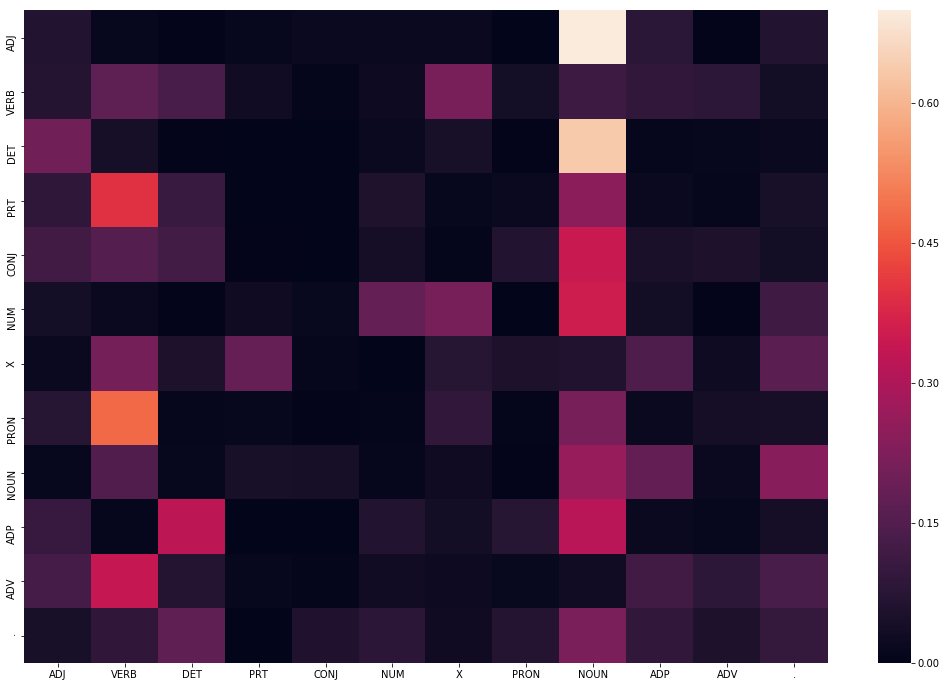

In [114]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()



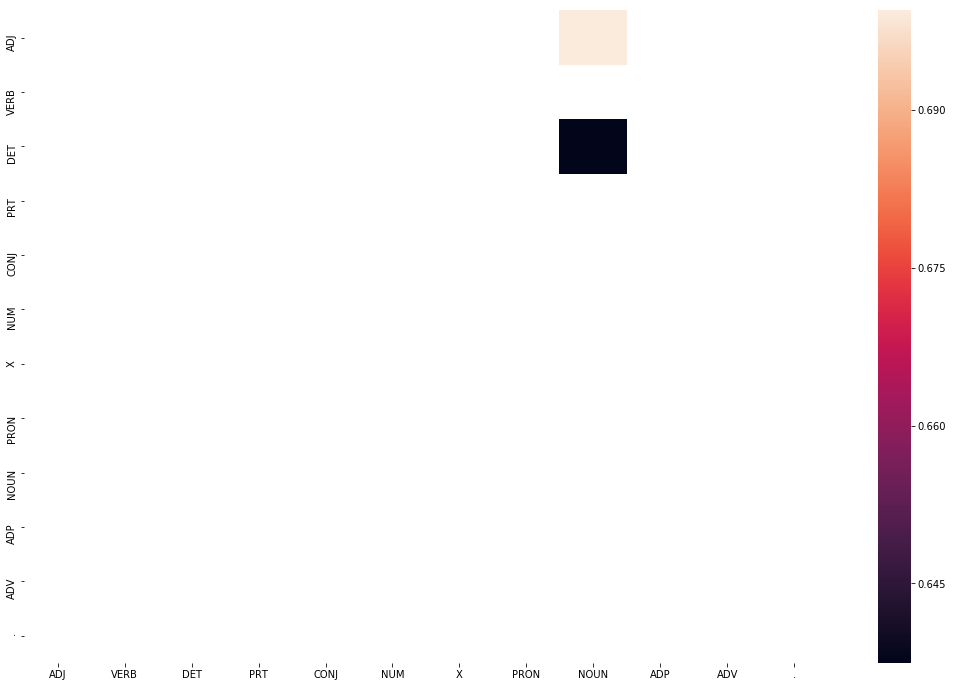

In [115]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

### Vanilla Viterbi Algorithm

In [116]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))




In [117]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('One', 'NUM'),
  ('could', 'VERB'),
  ('argue', 'VERB'),
  ('that', 'ADP'),
  ('it', 'PRON'),
  ('*EXP*-1', 'X'),
  ('is', 'VERB'),
  ('not', 'ADV'),
  ('an', 'DET'),
  ('assertion', 'NOUN'),
  ('of', 'ADP'),
  ('a', 'DET'),
  ('item', 'NOUN'),
  ('veto', 'NOUN'),
  ('at', 'ADP'),
  ('all', 'DET'),
  ('for', 'ADP'),
  ('the', 'DET'),
  ('president', 'NOUN'),
  (',', '.'),
  ('by', 'ADP'),
  ('*-2', 'X'),
  ('exerting', 'VERB'),
  ('a', 'DET'),
  ('power', 'NOUN'),
  ('of', 'ADP'),
  ('excision', 'NOUN'),
  (',', '.'),
  ('to', 'PRT'),
  ('resist', 'VERB'),
  ('unconstitutional', 'ADJ'),
  ('conditions', 'NOUN'),
  ('in', 'ADP'),
  ('legislation', 'NOUN'),
  ('that', 'DET'),
  ('*T*-3', 'X'),
  ('violate', 'VERB'),
  ('the', 'DET'),
  ('separation', 'NOUN'),
  ('of', 'ADP'),
  ('powers', 'NOUN'),
  ('.', '.')],
 [('A', 'DET'),
  ('medium-sized', 'ADJ'),
  ('one', 'NUM'),
  ('in', 'ADP'),
  ('Brooklyn', 'NOUN'),
  (',', '.'),
  ('it', 'PRON'),
  ('says', 'VERB'),
  ('0', 'X'),
  ('*T*

In [118]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [119]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  23.108728170394897
[('One', 'NUM'), ('could', 'VERB'), ('argue', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ('*EXP*-1', 'X'), ('is', 'VERB'), ('not', 'ADV'), ('an', 'DET'), ('assertion', 'NOUN'), ('of', 'ADP'), ('a', 'DET'), ('item', 'NOUN'), ('veto', 'NOUN'), ('at', 'ADP'), ('all', 'DET'), ('for', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), (',', '.'), ('by', 'ADP'), ('*-2', 'X'), ('exerting', 'VERB'), ('a', 'DET'), ('power', 'NOUN'), ('of', 'ADP'), ('excision', 'NOUN'), (',', '.'), ('to', 'PRT'), ('resist', 'VERB'), ('unconstitutional', 'ADJ'), ('conditions', 'NOUN'), ('in', 'ADP'), ('legislation', 'NOUN'), ('that', 'ADP'), ('*T*-3', 'X'), ('violate', 'VERB'), ('the', 'DET'), ('separation', 'NOUN'), ('of', 'ADP'), ('powers', 'NOUN'), ('.', '.'), ('A', 'DET'), ('medium-sized', 'ADJ'), ('one', 'NUM'), ('in', 'ADP'), ('Brooklyn', 'NOUN'), (',', '.'), ('it', 'PRON'), ('says', 'VERB'), ('0', 'X'), ('*T*-1', 'X'), (',', '.'), ('could', 'VERB'), ('be', 'VERB'), ('a

In [123]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [121]:
accuracy = len(check)/len(tagged_seq)

In [122]:
accuracy

0.9882352941176471

In [124]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [125]:
incorrect_tagged_cases

[[('legislation', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('house', 'VERB'), (('up', 'ADV'), ('up', 'ADP'))]]

In [126]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dinesh.veluri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
## Testing
sentence_test = 'Before entering politics, Donald Trump was a domineering businessman and a television personality.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [128]:
print(tagged_seq)
print(difference)

[('Before', 'ADP'), ('entering', 'VERB'), ('politics', 'NOUN'), (',', '.'), ('Donald', 'NOUN'), ('Trump', 'NOUN'), ('was', 'VERB'), ('a', 'DET'), ('domineering', 'ADJ'), ('businessman', 'NOUN'), ('and', 'CONJ'), ('a', 'DET'), ('television', 'NOUN'), ('personality', 'ADJ'), ('.', '.')]
2.3883261680603027


In [129]:
#This method is to find the probabilities of unknown words.
def emission_word_analysis(word):
    tags = list(set([pair[1] for pair in train_tagged_words]))
    p = []
    for tag in tags:
        emissions = word_given_tag(word, tag)[0]/word_given_tag(word, tag)[1]
        p.append(emissions)
    print(list(zip(tags,p)))

In [130]:
emission_word_analysis('Android')


[('ADJ', 0.0), ('VERB', 0.0), ('DET', 0.0), ('PRT', 0.0), ('CONJ', 0.0), ('NUM', 0.0), ('X', 0.0), ('PRON', 0.0), ('NOUN', 0.0), ('ADP', 0.0), ('ADV', 0.0), ('.', 0.0)]


##### Answer 1: Rule Based -  Assign Noun when prob are 0

In [132]:
# Viterbi Heuristic
def Viterbi_ruled_based(words, train_bag = train_tagged_words):
    state = []
    pmaxes = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p   
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        
        #This the only for defaulting Noun in case of missing values
        if pmax == 0.0:
            state_max = 'NOUN'
        else:
            state_max = T[p.index(pmax)] 
        
        pmaxes.append(pmax)
        state.append(state_max)
    return list(zip(words, state))

In [133]:
#Tagging the sentences of the test set using the model
start = time.time()
tagged_seq_viterbi_rule_based = Viterbi_ruled_based(test_tagged_words)
end = time.time()
difference = end-start

In [134]:
print("Time taken in seconds: ", difference)
print(tagged_seq_viterbi_rule_based)


Time taken in seconds:  23.75229287147522
[('One', 'NUM'), ('could', 'VERB'), ('argue', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ('*EXP*-1', 'X'), ('is', 'VERB'), ('not', 'ADV'), ('an', 'DET'), ('assertion', 'NOUN'), ('of', 'ADP'), ('a', 'DET'), ('item', 'NOUN'), ('veto', 'NOUN'), ('at', 'ADP'), ('all', 'DET'), ('for', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), (',', '.'), ('by', 'ADP'), ('*-2', 'X'), ('exerting', 'VERB'), ('a', 'DET'), ('power', 'NOUN'), ('of', 'ADP'), ('excision', 'NOUN'), (',', '.'), ('to', 'PRT'), ('resist', 'VERB'), ('unconstitutional', 'ADJ'), ('conditions', 'NOUN'), ('in', 'ADP'), ('legislation', 'NOUN'), ('that', 'ADP'), ('*T*-3', 'X'), ('violate', 'VERB'), ('the', 'DET'), ('separation', 'NOUN'), ('of', 'ADP'), ('powers', 'NOUN'), ('.', '.'), ('A', 'DET'), ('medium-sized', 'ADJ'), ('one', 'NUM'), ('in', 'ADP'), ('Brooklyn', 'NOUN'), (',', '.'), ('it', 'PRON'), ('says', 'VERB'), ('0', 'X'), ('*T*-1', 'X'), (',', '.'), ('could', 'VERB'), ('be', 'VERB'), ('al

In [135]:

check_viterbi_trans = [i for i, j in zip(tagged_seq_viterbi_rule_based, test_run_base) if i == j] 
accuracy_viterbi_trans = len(check_viterbi_trans)/len(tagged_seq_viterbi_rule_based)
print("Accuracy with rule based probabilistic:", accuracy_viterbi_trans)

Accuracy with rule based probabilistic: 0.9882352941176471


In [136]:
## Verifying the tagging for unknown words in the validation text file with few sentences.
sentence_test = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_test_viterbi_rule_based = Viterbi_ruled_based(words)
end = time.time()
difference = end-start

In [137]:
print(tagged_test_viterbi_rule_based)
print(difference)

[('The', 'DET'), ('2018', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'NOUN'), ('contested', 'NOUN'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]
3.557281017303467


#### Answer 2: Using transition probabilities in case of UNKNOWN word

In [138]:
def Viterbi_unknown(words, train_bag = train_tagged_words):
    state = []
    
    
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p        
            
            p.append(state_probability)   
            
            
        pmax = max(p)
        
        if pmax == 0.0:
            trans_p = []
            for tag in T:
                if key == 0:
                    transition_p = tags_df.loc['.', tag]
                else:
                    transition_p = tags_df.loc[state[-1], tag]
                
                trans_p.append(transition_p)
            
            tmax = max(trans_p)
            state_max = T[trans_p.index(tmax)]
            state.append(state_max)
        else:
            state_max = T[p.index(pmax)] 
            state.append(state_max)
        
    return list(zip(words, state))

In [140]:
start = time.time()
tagged_seq_viterbi_unknown = Viterbi_unknown(test_tagged_words)
end = time.time()
difference = end-start

In [141]:
print("Time taken in seconds: ", difference)
print(tagged_seq_viterbi_unknown)

Time taken in seconds:  23.033352851867676
[('One', 'NUM'), ('could', 'VERB'), ('argue', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ('*EXP*-1', 'X'), ('is', 'VERB'), ('not', 'ADV'), ('an', 'DET'), ('assertion', 'NOUN'), ('of', 'ADP'), ('a', 'DET'), ('item', 'NOUN'), ('veto', 'NOUN'), ('at', 'ADP'), ('all', 'DET'), ('for', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), (',', '.'), ('by', 'ADP'), ('*-2', 'X'), ('exerting', 'VERB'), ('a', 'DET'), ('power', 'NOUN'), ('of', 'ADP'), ('excision', 'NOUN'), (',', '.'), ('to', 'PRT'), ('resist', 'VERB'), ('unconstitutional', 'ADJ'), ('conditions', 'NOUN'), ('in', 'ADP'), ('legislation', 'NOUN'), ('that', 'ADP'), ('*T*-3', 'X'), ('violate', 'VERB'), ('the', 'DET'), ('separation', 'NOUN'), ('of', 'ADP'), ('powers', 'NOUN'), ('.', '.'), ('A', 'DET'), ('medium-sized', 'ADJ'), ('one', 'NUM'), ('in', 'ADP'), ('Brooklyn', 'NOUN'), (',', '.'), ('it', 'PRON'), ('says', 'VERB'), ('0', 'X'), ('*T*-1', 'X'), (',', '.'), ('could', 'VERB'), ('be', 'VERB'), ('a

In [142]:
# Accuracy of the vanilla viterbi on the test set.
check_viterbi_prob = [i for i, j in zip(tagged_seq_viterbi_unknown, test_run_base) if i == j] 
accuracy_viterbi_prob = len(check_viterbi_prob)/len(tagged_seq_viterbi_unknown)
print("Accuracy with probabilistic Viterbi:", accuracy_viterbi_prob)

Accuracy with probabilistic Viterbi: 0.9882352941176471


In [143]:
## Verifying the tagging for unknown words in the validation text file with few sentences.
sentence_test = 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_test_viterbi_unknown = Viterbi_unknown(words)
end = time.time()
difference = end-start

In [144]:
print(tagged_test_viterbi_unknown)
print(difference)

[('Show', 'NOUN'), ('me', 'PRON'), ('the', 'DET'), ('price', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('flights', 'NOUN'), ('leaving', 'VERB'), ('Atlanta', 'NOUN'), ('at', 'ADP'), ('about', 'ADP'), ('3', 'NUM'), ('in', 'ADP'), ('the', 'DET'), ('afternoon', 'NOUN'), ('and', 'CONJ'), ('arriving', 'NOUN'), ('in', 'ADP'), ('San', 'NOUN'), ('Francisco', 'NOUN'), ('.', '.')]
2.8362669944763184


#### Explanation:

- Based on the above, all the words which are unknown are being populated with NNS. 
- Twitter and Google are now tagged correctly

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

##### Sentence 1: 
'Google and Twitter made a deal in 2015 that gave Google access to Twitter''s firehose.'

In [145]:
## Verifying the tagging for unknown words in the validation text file with few sentences.
sentence_test = 'Google and Twitter made a deal in 2015 that gave Google access to Twitter''s firehose.'
words = word_tokenize(sentence_test)
tagged_seq_validation = Viterbi(words)
print(tagged_seq_validation)

[('Google', 'ADJ'), ('and', 'CONJ'), ('Twitter', 'ADJ'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'ADJ'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'ADJ'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitters', 'ADJ'), ('firehose', 'ADJ'), ('.', '.')]


In [146]:
## Verifying the tagging for unknown words in the validation text file with few sentences.
sentence_test = 'Google and Twitter made a deal in 2015 that gave Google access to Twitter''s firehose.'
words = word_tokenize(sentence_test)
tagged_test_viterbi_prob_unknown = Viterbi_unknown(words)
print(tagged_test_viterbi_prob_unknown)

[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitters', 'VERB'), ('firehose', 'X'), ('.', '.')]


##### Sentence 2: 
 The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.

In [147]:
## Verifying the tagging for unknown words in the validation text file with few sentences.
sentence_test = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test)
tagged_seq_validation = Viterbi(words)
print(tagged_seq_validation)

[('The', 'DET'), ('2018', 'ADJ'), ('FIFA', 'ADJ'), ('World', 'NOUN'), ('Cup', 'ADJ'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'ADJ'), ('FIFA', 'ADJ'), ('World', 'NOUN'), ('Cup', 'ADJ'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'ADJ'), ('tournament', 'ADJ'), ('contested', 'ADJ'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]


In [148]:
#probabilistic improvement
sentence_test = 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
words = word_tokenize(sentence_test)
tagged_test_viterbi_prob = Viterbi_unknown(words)
print(tagged_test_viterbi_prob)

[('The', 'DET'), ('2018', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('21st', 'NOUN'), ('FIFA', 'NOUN'), ('World', 'NOUN'), ('Cup', 'NOUN'), (',', '.'), ('an', 'DET'), ('international', 'ADJ'), ('football', 'NOUN'), ('tournament', 'NOUN'), ('contested', 'NOUN'), ('once', 'ADV'), ('every', 'DET'), ('four', 'NUM'), ('years', 'NOUN'), ('.', '.')]
